# Computing best pokemon types

here we try to find what is the strongest pokemon type, looking exclusively at the type matchup chart.

we define strong using three principles:

1. a strong type has a high offensive score
2. a strong type has a low damage-taking score
3. a strong type has good scores against other strong types

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Gen 6 onwards

gen 6 introduced the fairy type to the game, which rebalanced the game considerably

In [2]:
# number of types
n_types = 18
n_iterations = 1000
weight_factor = .156
# weight_factor = .15762

In [3]:
#type enum
normal = 0
fighting = 1
flying = 2
poison = 3
ground = 4
rock = 5
bug = 6
ghost = 7
steel = 8
fire = 9
water = 10
grass = 11
electric = 12
psychic = 13
ice = 14
dragon = 15
dark = 16
fairy = 17

In [4]:
types = ["normal", "fighting", "flying", "poison", "ground", "rock",
         "bug", "ghost", "steel", "fire", "water", "grass",
         "electric","psychic", "ice", "dragon", "dark", "fairy"
]

colors = ["#a8a87c", '#c32d29', '#a990eb', '#a33f9c', '#e1c071', '#b9a045',
         '#a7b83c', '#715895', '#b8b8cf', '#f37f3a', '#6590eb', '#73c85e',
         '#fad04a', '#fc5586', '#94d8d8', '#7138f1', '#715849', '#f198ab']

In [5]:
# effectiveness matrix
eff = np.array([
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [2.0, 1.0, 0.5, 0.5, 1.0, 2.0, 0.5, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, 0.5],
    [1.0, 2.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 0.5, 1.0, 1.0, 2.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
    [1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.5, 1.0, 2.0, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 0.5, 2.0, 1.0, 0.5, 1.0, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0],
    [1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.5],
    [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 2.0, 1.0, 1.0, 2.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, 0.5, 0.5, 2.0, 1.0, 1.0, 2.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 0.5, 0.5, 2.0, 2.0, 0.5, 1.0, 0.5, 0.5, 2.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.0, 1.0],
    [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 2.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0],
    [1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 0.5],
    [1.0, 2.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0],
])

In [124]:
weights = np.ones((n_iterations + 1, n_types))
scores = np.zeros((n_iterations, n_types))

def_weights = np.ones((n_iterations + 1, n_types))
def_scores = np.zeros((n_iterations, n_types))

off_weights = np.ones((n_iterations + 1, n_types))
off_scores = np.zeros((n_iterations, n_types))


for i in range(n_iterations):
    for j in range(n_types):
        # balanced scores are calculated with all scores
        scores[i][j] = np.dot(eff[j], weights[i]) - np.dot(eff[:, j], weights[i])
        weights[i+1][j] = 1 + scores[i][j] * weight_factor
        
        # defensive scores use offensive weights
        def_scores[i][j] = -np.dot(eff[:, j], off_weights[i])
        def_weights[i+1][j] = 1 + def_scores[i][j] / 20

        # offensive scores use defensive weights
        off_scores[i][j] = np.dot(eff[j], def_weights[i])
        off_weights[i+1][j] = 1 + off_scores[i][j] / 20
#         off_weights[i+1][j] = off_scores[i][j] / 20

In [62]:
# scores in the first iteration
# pd.Series(data=scores[0], index=types).sort_values(ascending=False)

In [61]:
# scores in the last iteration
final_scores_6 = pd.Series(data=scores[n_iterations-1], index=types)
# final_scores_6.sort_values(ascending=False)

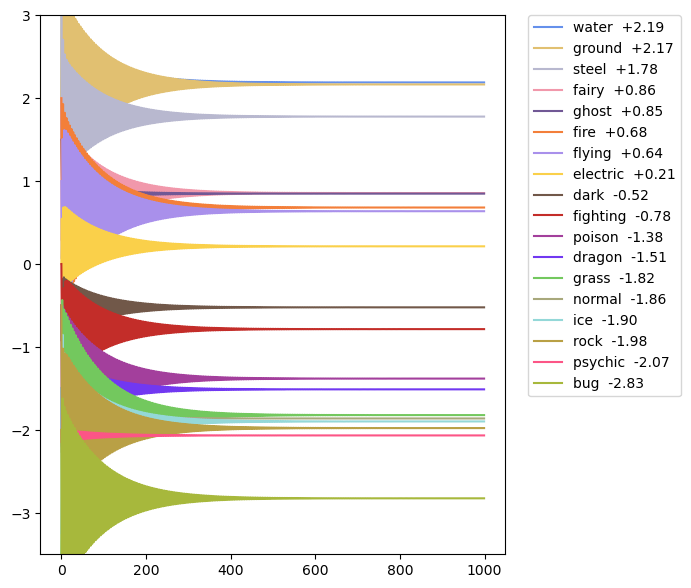

In [125]:
plt.figure(figsize=(6, 7))
for i in scores[n_iterations-1].argsort()[::-1]:
    plt.plot(scores[:, i], color=colors[i], label=f'{types[i]}  {scores[:, i][n_iterations-1]:+.2f}')

plt.ylim([-3.5, 3])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

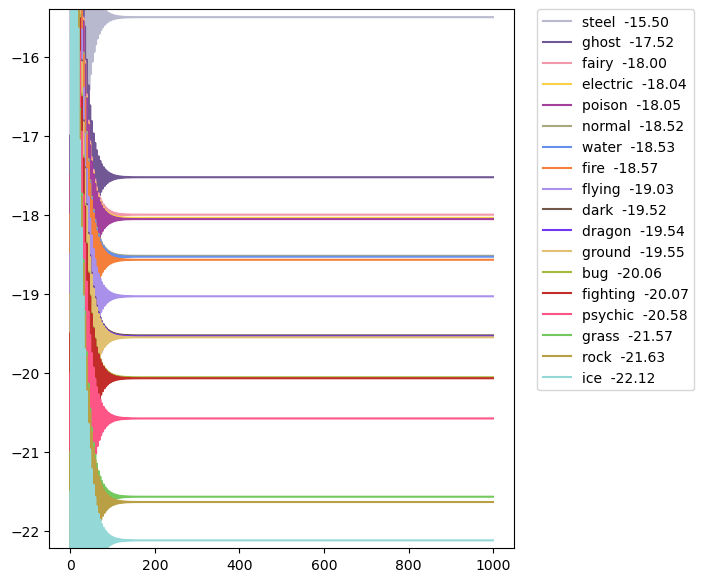

In [126]:
plt.figure(figsize=(6, 7))
for i in def_scores[n_iterations-1].argsort()[::-1]:
    plt.plot(def_scores[:, i], color=colors[i], label=f'{types[i]}  {def_scores[:, i][n_iterations-1]:+.2f}')

plt.ylim([min(def_scores[:,][n_iterations-1])-.1, max(def_scores[:,][n_iterations-1])+.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

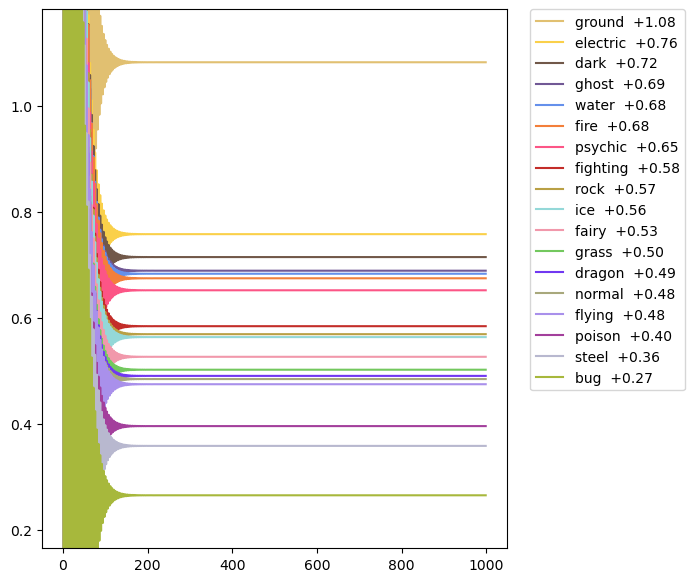

In [127]:
plt.figure(figsize=(6, 7))
for i in off_scores[n_iterations-1].argsort()[::-1]:
    plt.plot(off_scores[:, i], color=colors[i], label=f'{types[i]}  {off_scores[:, i][n_iterations-1]:+.2f}')

plt.ylim([min(off_scores[:,][n_iterations-1])-.1, max(off_scores[:,][n_iterations-1])+.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [113]:
off_scores[:,][n_iterations-1]

array([0.48494939, 0.58472228, 0.47518324, 0.39615239, 1.08288025,
       0.56965441, 0.2655449 , 0.68946312, 0.35877585, 0.67513544,
       0.68372283, 0.5025758 , 0.75844475, 0.65248697, 0.56412829,
       0.49092767, 0.71517585, 0.52694443])

## Gen 5

without the fairy type, we should see considerable difference, mainly with the dragon type

In [10]:
n_types_5 = 17

In [11]:
weights_5 = np.ones((n_iterations + 1, n_types_5))
scores_5 = np.zeros((n_iterations, n_types_5))

for i in range(n_iterations):
    for j in range(n_types_5):
        scores_5[i][j] = np.dot(eff[j][:n_types_5], weights_5[i]) - np.dot(eff[:, j][:n_types_5], weights_5[i])
        weights_5[i+1][j] = 1 + scores_5[i][j] * weight_factor

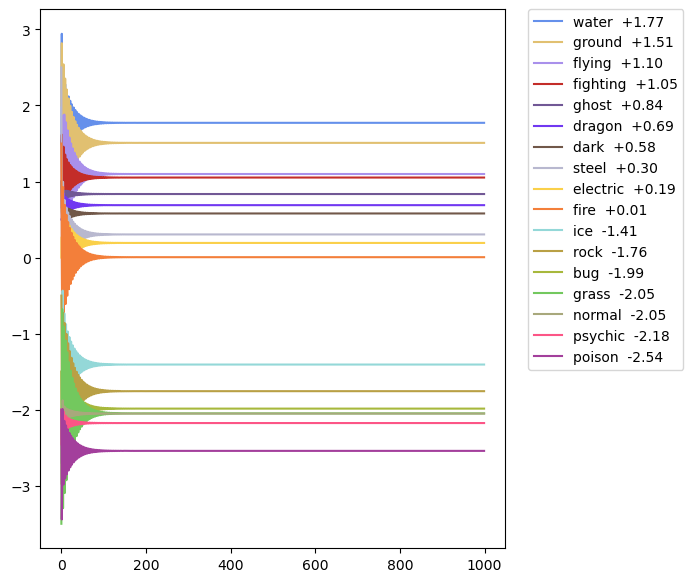

In [12]:
plt.figure(figsize=(6, 7))
for i in scores_5[n_iterations-1].argsort()[::-1]:
    plt.plot(scores_5[:, i], color=colors[i], label=f'{types[i]}  {scores_5[:, i][n_iterations-1]:+.2f}')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [13]:
# scores in the first iteration
pd.Series(data=scores_5[0], index=types[:n_types_5]).sort_values(ascending=False)

steel       2.5
ground      2.0
ghost       1.5
water       1.5
fire        1.5
fighting    1.5
dark        1.0
flying      1.0
dragon      0.5
electric    0.0
rock       -0.5
bug        -1.5
ice        -1.5
poison     -2.0
psychic    -2.0
normal     -2.0
grass      -3.5
dtype: float64

In [16]:
# scores in the last iteration
final_scores_5 = pd.Series(data=scores_5[n_iterations-1], index=types[:n_types_5])
final_scores_5.sort_values(ascending=False)

water       1.772172
ground      1.508499
flying      1.099129
fighting    1.052701
ghost       0.835926
dragon      0.689510
dark        0.580275
steel       0.304582
electric    0.192765
fire        0.005391
ice        -1.406209
rock       -1.756377
bug        -1.985751
grass      -2.048544
normal     -2.050981
psychic    -2.175566
poison     -2.541457
dtype: float64

## position changes from 5 to 6

In [39]:
change = np.array(list(zip(final_scores_5, final_scores_6)))

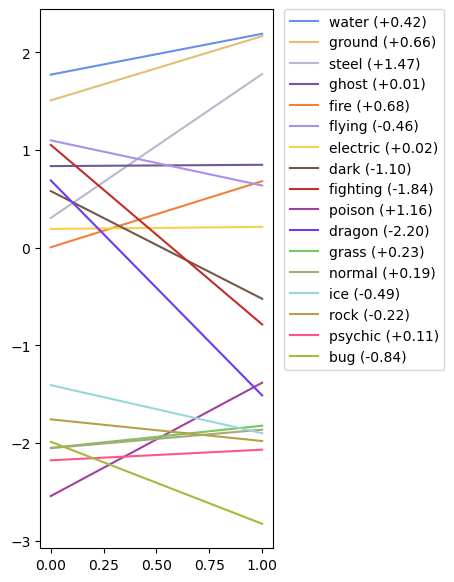

In [49]:
plt.figure(figsize=(3, 7))
for i in scores[n_iterations-1][:n_types_5].argsort()[::-1]:
    plt.plot(change[i], color=colors[i], label=f'{types[i]} ({change[i][1]-change[i][0]:+.2f})')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## which dual-typing is best

In [152]:
n_dual_types = int(n_types*(n_types+1)/2)

In [193]:
dual_eff = np.zeros((n_dual_types, n_dual_types))
dual_types = [''] * n_dual_types

# i_1: primary offensive typing
# i_1: secondary offensive typing
# j_1: primary defensive typing
# j_1: secondary defensive typing
i = 0
for i_1 in range(n_types):
    for i_2 in range(i_1, n_types, 1):
        dual_types[i] = f'{types[i_1]}-{types[i_2]}'
        j = 0
        for j_1 in range(n_types):
            for j_2 in range(j_1, n_types, 1):
                if j_1 == j_2:
                    dual_eff[i][j] = max(eff[i_1][j_1], eff[i_2][j_1])
                else:
                    eff_1 = eff[i_1][j_1] * eff[i_1][j_2]
                    eff_2 = eff[i_2][j_1] * eff[i_2][j_2]
                    dual_eff[i][j] = max(eff_1, eff_2)
                j += 1
        i += 1      

In [232]:
weights_dual = np.ones((n_iterations + 1, n_dual_types))
scores_dual = np.zeros((n_iterations, n_dual_types))

def_weights_dual = np.ones((n_iterations + 1, n_dual_types))
def_scores_dual = np.zeros((n_iterations, n_dual_types))

off_weights_dual = np.ones((n_iterations + 1, n_dual_types))
off_scores_dual = np.zeros((n_iterations, n_dual_types))

for i in range(n_iterations):
    for j in range(n_dual_types):
        scores_dual[i][j] = np.dot(dual_eff[j], weights_dual[i]) - np.dot(dual_eff[:, j], weights_dual[i])
        weights_dual[i+1][j] = 1 + scores_dual[i][j] * weight_factor * .078
        
        # defensive scores use offensive weights
        def_scores_dual[i][j] = -np.dot(dual_eff[:, j], off_weights_dual[i])
        def_weights_dual[i+1][j] = 1 + def_scores_dual[i][j] / 256

        # offensive scores use defensive weights
        off_scores_dual[i][j] = np.dot(dual_eff[j], def_weights_dual[i])
        off_weights_dual[i+1][j] = 1 + off_scores_dual[i][j] / 256

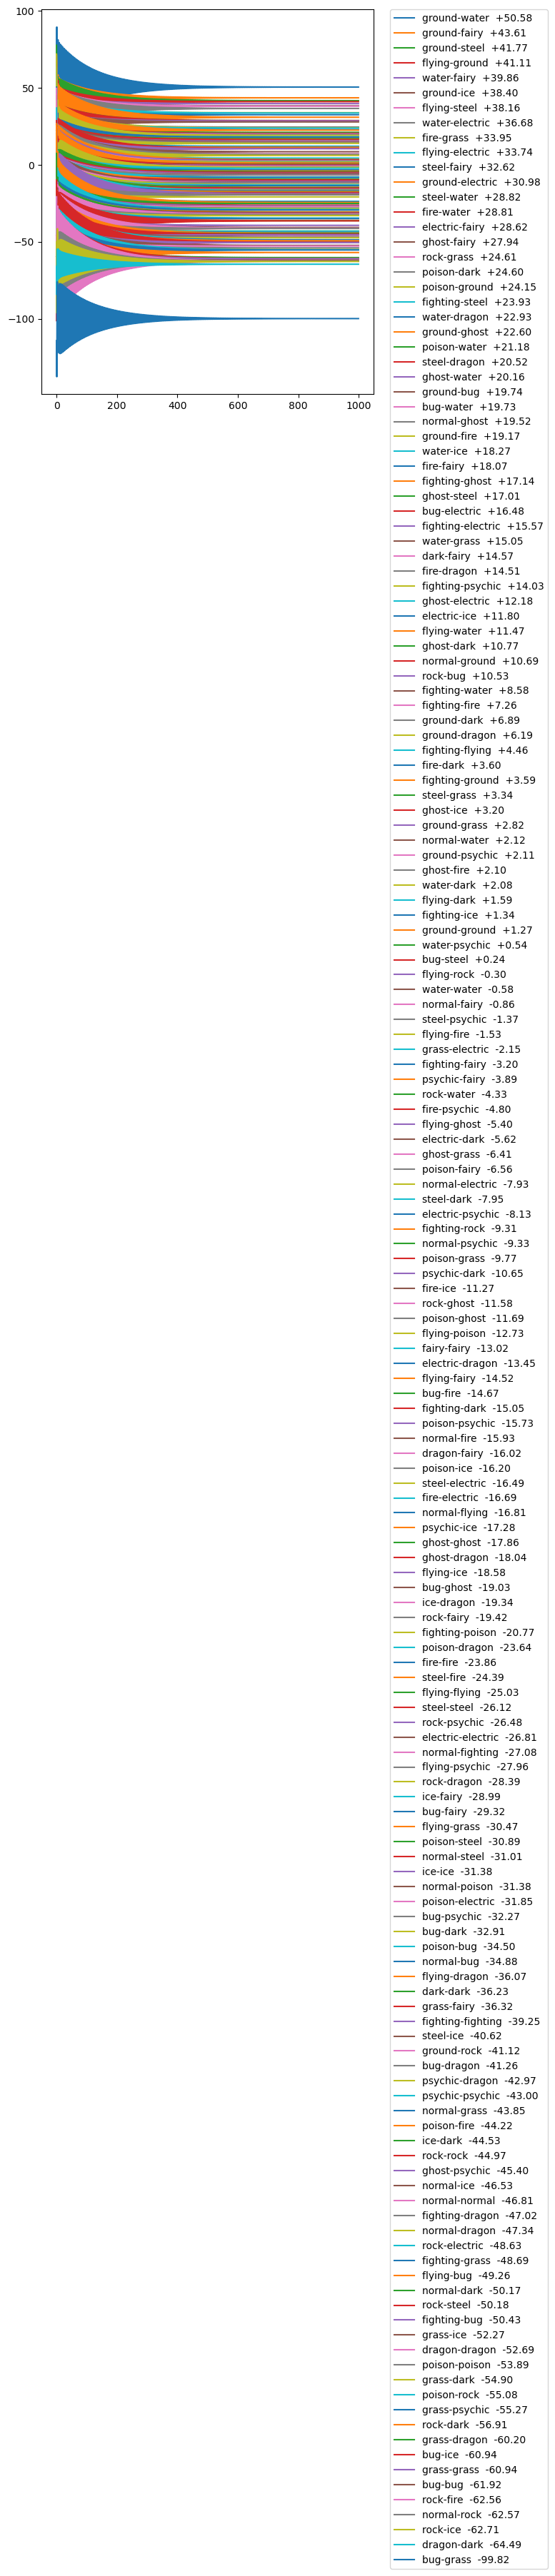

In [220]:
plt.figure(figsize=(6, 7))
for i in scores_dual[n_iterations-1].argsort()[::-1]:
    plt.plot(scores_dual[:, i], label=f'{dual_types[i]}  {scores_dual[:, i][n_iterations-1]:+.2f}')

# plt.ylim([-3.5, 3])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

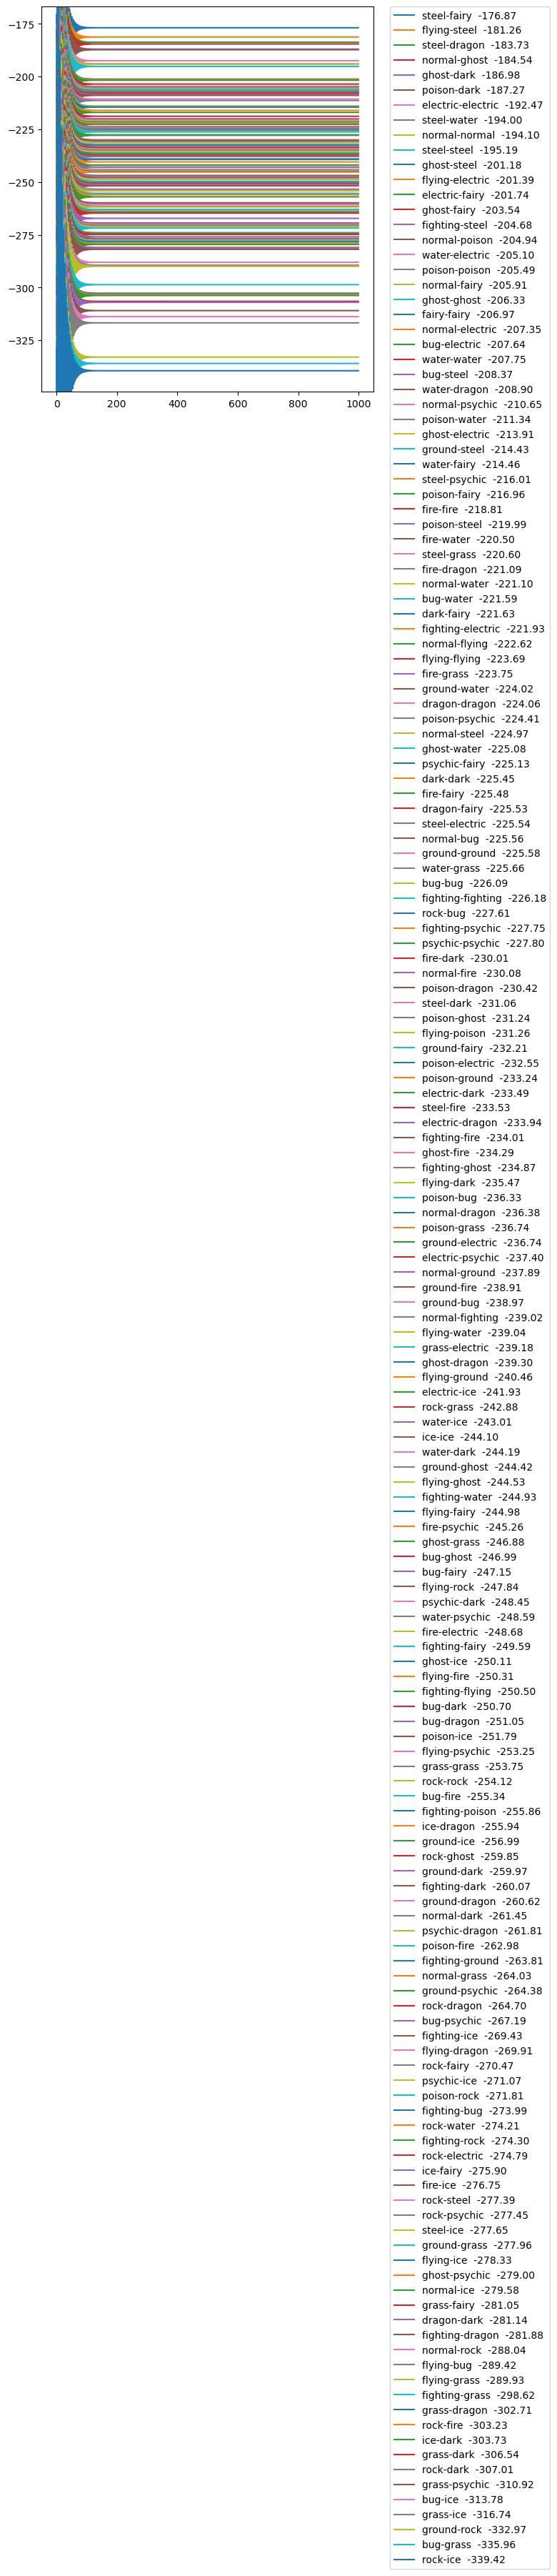

In [235]:
plt.figure(figsize=(6, 7))
for i in def_scores_dual[n_iterations-1].argsort()[::-1]:
    plt.plot(def_scores_dual[:, i], label=f'{dual_types[i]}  {def_scores_dual[:, i][n_iterations-1]:+.2f}')

plt.ylim([min(def_scores_dual[:,][n_iterations-1])-10, max(def_scores_dual[:,][n_iterations-1])+10])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

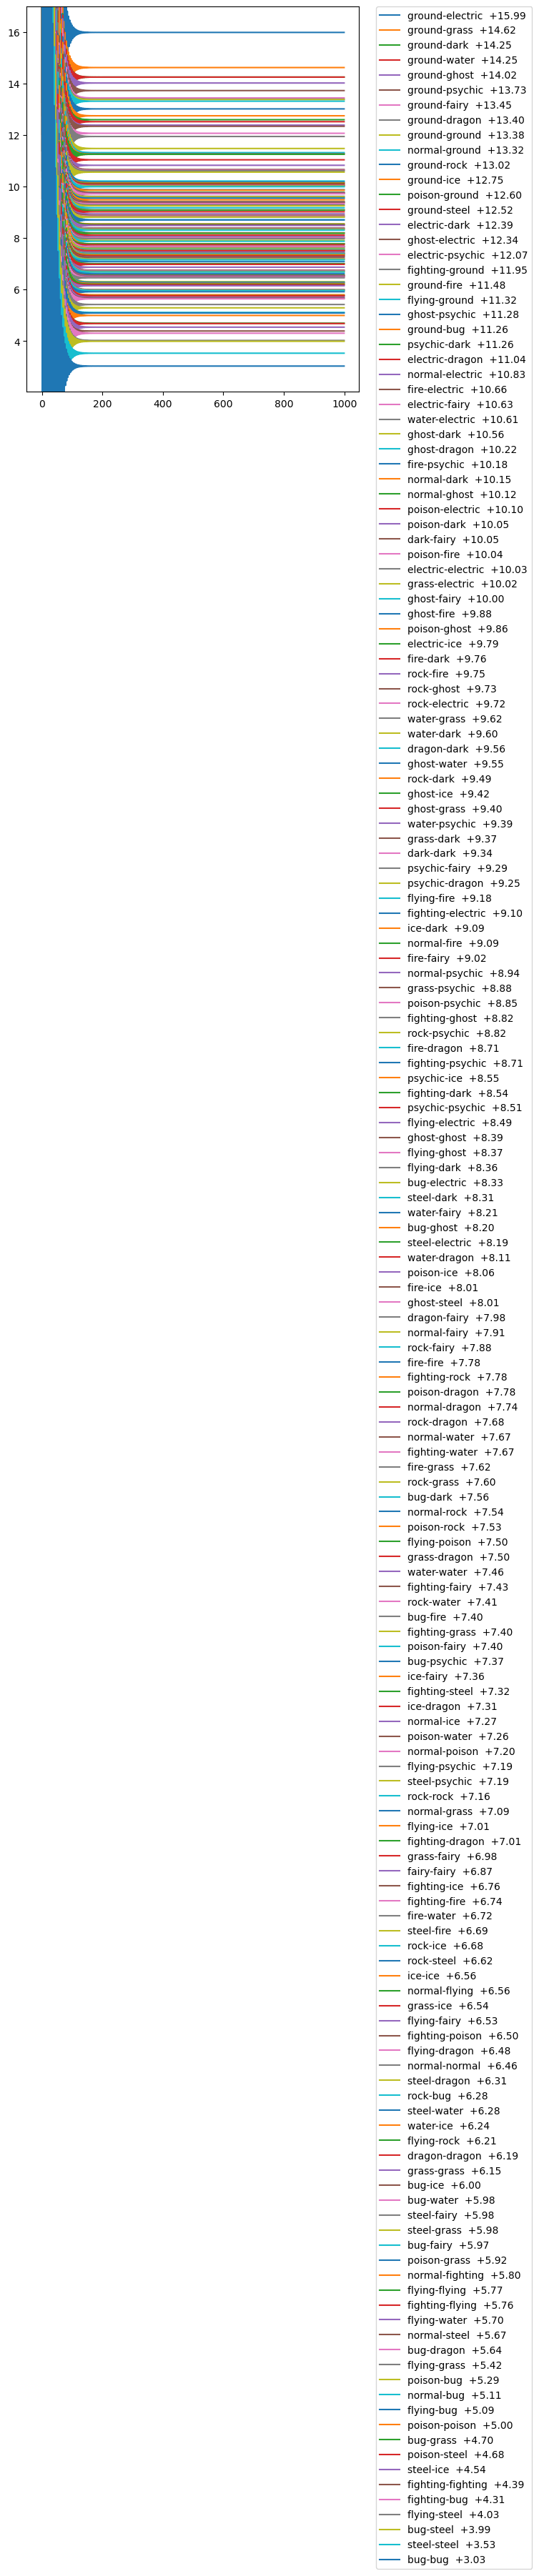

In [237]:
plt.figure(figsize=(6, 7))
for i in off_scores_dual[n_iterations-1].argsort()[::-1]:
    plt.plot(off_scores_dual[:, i], label=f'{dual_types[i]}  {off_scores_dual[:, i][n_iterations-1]:+.2f}')

plt.ylim([min(off_scores_dual[:,][n_iterations-1])-1, max(off_scores_dual[:,][n_iterations-1])+1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()